In [15]:
import numpy as np
from flares.data import get_data, get_dates
import matplotlib.pyplot as plt

cmap = "Greys"

# Summary
For this notebook, we will be extracting the Neutral Line from the harpnumber 7115 at 2017/09/06 12:00:00 UTC

In [16]:
hnum = 7115
root = "../example_data/raw"
dates = get_dates(hnum, root)
date = dates[1]
print("Date = ", date)
print("Harpnumber = ", hnum)

Date =  2017-09-06 12:00:00
Harpnumber =  7115


# Raw Data Product
```get_data``` returns a dictionary with keys to all of the raw data products extracted from the disk. For this case, we are intersted in the continuum data product.

In [17]:
data = get_data(hnum, date, root)
print("Data Products: ", data.keys())
Bz = data["Bz"] # We are only interested in the continuum for now

Data Products:  dict_keys(['Bz', 'By', 'Bx', 'cont', 'sharps'])


### Plotting the original Continuum
This image shows the intensity at each pixel. Darker pixels have lesser intensity, brighter pixels have higher intensity

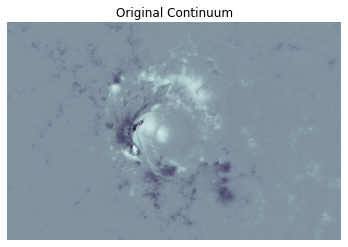

In [18]:
plt.imshow(Bz, cmap = "bone")
plt.axis(False)
plt.title("Original Continuum")
plt.savefig("./outputs/neutralline/nl_original.png")
plt.show()

# The Algorithm
## Step 1 - Isolate highly positive and highly negative regions

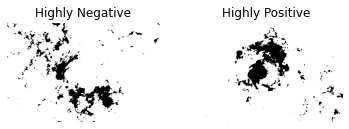

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

pos, neg = Bz > 150, Bz < -150

ax1.imshow(neg, cmap = cmap)
ax1.set_title("Highly Negative")
ax1.axis(False)
ax2.imshow(pos, cmap = cmap)
ax2.set_title("Highly Positive")
ax2.axis(False)

plt.savefig("./outputs/neutralline/posneg.png")
plt.show()

## Step 2 - Find high gradient inversion lines by intersecting dilated positive and negative regions

Obviously, these two regions are disjoint (A region can't be positive and negative at the same time!), so we slightly expand both regions using a [binary_dilation](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_dilation). The figures below show this slight expansion.

They look fairly similar, notice how the bottom images are slightly inflated

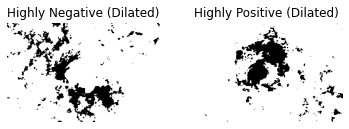

In [20]:
from skimage.morphology import square, binary_dilation

fig, (ax1, ax2) = plt.subplots(1, 2)

pos, neg = binary_dilation(pos, square(3)), binary_dilation(neg, square(3))

ax1.imshow(neg, cmap = cmap)
ax1.set_title("Highly Negative (Dilated)")
ax1.axis(False)
ax2.imshow(pos, cmap = cmap)
ax2.set_title("Highly Positive (Dilated)")
ax2.axis(False)

plt.savefig("./outputs/neutralline/dilated.png")
plt.show()

When we intersect these dilations, regions of highly positive change rapidly to highly negative (high gradient inversion).

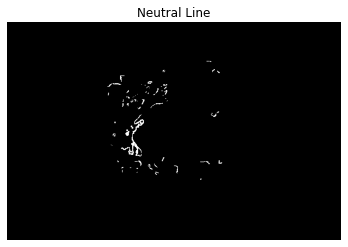

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [22]:
from skimage.morphology import square, binary_dilation

fig, (ax1) = plt.subplots(1, 1)

neutral_line = pos & neg

ax1.imshow(~neutral_line, cmap = cmap)
ax1.set_title("Neutral Line")
ax1.axis(False)

plt.savefig("./outputs/neutralline/neutralline.png")
plt.show()

